In [1]:
# Imports
import matplotlib.pyplot as plt
import maze_dataset as md
import maze_generator.maze_dataset as md
import numpy as np
import DQN.training as trainer
import DQN.agent as agent
import DQN.models as models
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game


In [2]:
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

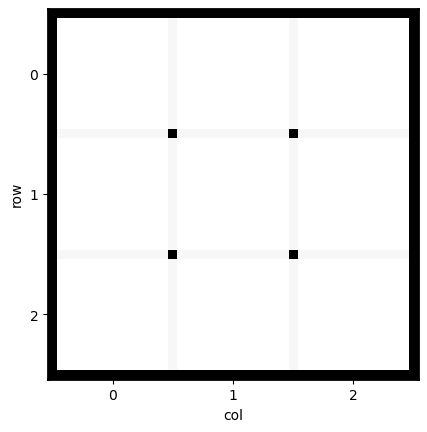

In [3]:
dataset.show_maze(0)

In [4]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
# --- maze agent with the type of model --- #
maze_agent = agent.maze_agents(models.CNN_version1,
                               vision=3,
                               action_type='cardinal')
# --- trainer of the agent --- #
train = trainer.Maze_Training(name = 'test15',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=100,
                              n_agents=1,
                              gamma = 0.99,
                              tau = 0.001,
                              batch_size = 64,
                              n_frames = 500000,
                              lr = 0.000025,
                              replay_buffer_size=10000,
                              target_update=10000,
                              policy_update=1,
                              lambda_entropy=0.4,
                              beta = 1,
                              alpha = 0.6
                              )
train.train()
train.save()

6 7
8 3
5 8
5 1
1 7
7 6
3 1


/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


4 8
1 3
5 3
7 5
6 0
6 4
3 8
3 4
8 7
1 5
0 8
1 7
5 0
4 3
0 2
2 5
7 4
6 2
6 0
2 7
3 4
4 6
5 0
5 4
3 2
7 0
5 6
7 6
3 6
7 4
8 3
5 7
4 5
1 5
6 7
8 0
7 5
3 1
3 7
3 4
0 2
8 1
4 1
8 7
5 1
0 4
8 7
3 2
3 6
4 6
4 0
8 3
3 8
1 3
0 8
0 8
3 5
7 2
1 8
4 5
4 8
4 3
6 1
2 3
1 8
3 1
8 6
7 8
7 8
7 0
8 5
2 7
5 0
1 2
1 5
2 3
7 8
7 4
6 4
4 0
8 7
5 6
1 8
6 0
4 3
4 5
1 3
1 4
7 3
1 6
6 8
3 5
4 7
2 0
7 8
8 5
3 0
0 6
2 7
4 0
5 3
5 6
1 7


KeyboardInterrupt: 

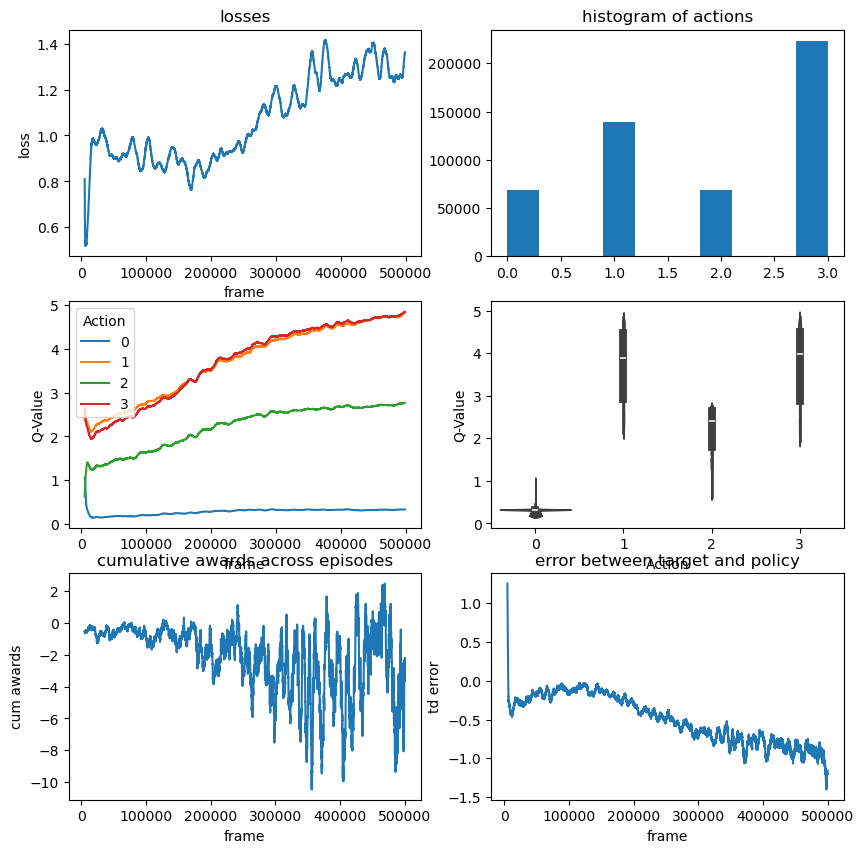

In [ ]:
train.results()

In [41]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
train.agents.run_agent(dataset.__getitem__(0),num_agents=1,len_game=50,epsilon=0,sample_prob=False,agents_pos=[0],targets_pos=[8])


UnboundLocalError: cannot access local variable 'pos' where it is not associated with a value

In [2]:
import DQN.agent as agent

load = agent.maze_agents.load('test14')

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/DQN/agent.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  param_load = torch.load(os.path.join(fd, f'agent.pth'))

In [3]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
testing_dataset = md.Maze_dataset(1,shape=(3,3),maze_type='percolation')

In [11]:
load.run_agent(testing_dataset[0],len_game=50,n_episodes=2,agents_pos = None, targets_pos =[8])

cumulative reward: [2.49]
cumulative reward: [4.1701]
